In [16]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.isotonic import IsotonicRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

In [17]:
df = pd.read_csv("../../data/adult.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df.columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "superior"
]

In [19]:
df = df.drop("native_country", axis=1)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,superior
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [20]:
df["superior"] = df["superior"].apply(lambda x: "<=50K" if x == " <=50K." or x== " <=50K" else ">50K")

In [21]:
df["superior"] = df["superior"].apply(lambda x: 0 if x == "<=50K" else 1)

In [73]:
sample_df = df.groupby('superior').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)
sample_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,superior
0,19,Private,55284,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,25,0
1,30,Private,216811,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,0
2,36,Local-gov,285865,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,0
3,37,Private,278924,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,40,0
4,20,Local-gov,325493,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31,Private,157640,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,1
9996,42,Private,118494,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,44,1
9997,43,Self-emp-inc,221172,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,40,1
9998,51,Self-emp-inc,304955,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,1


In [75]:
df_used = pd.get_dummies(sample_df)

In [77]:
scale = StandardScaler()
columns = df_used.columns
y = df_used["superior"].copy()
df_used = pd.DataFrame(scale.fit_transform(df_used))
df_used.columns = columns
df_used["superior"] = y.copy()
df_used.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,superior,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,-1.650677,-1.299276,-0.620387,-0.196752,-0.264003,-1.419026,0,-0.210163,-0.195188,-0.276034,...,2.887398,-0.297879,-0.257978,-0.089235,-0.185022,-0.297281,-0.080886,0.384331,1.627770,-1.627770
1,-0.806062,0.259538,-0.620387,-0.196752,-0.264003,-0.170784,0,-0.210163,-0.195188,-0.276034,...,-0.346333,-0.297879,-0.257978,11.206350,-0.185022,-0.297281,-0.080886,-2.601924,-0.614337,0.614337
2,-0.345363,0.925942,0.917318,-0.196752,-0.264003,-0.170784,0,-0.210163,-0.195188,3.622747,...,-0.346333,-0.297879,-0.257978,-0.089235,-0.185022,3.363818,-0.080886,-2.601924,1.627770,-1.627770
3,-0.268580,0.858958,-0.620387,-0.196752,-0.264003,-0.170784,0,-0.210163,-0.195188,-0.276034,...,-0.346333,-0.297879,-0.257978,-0.089235,-0.185022,-0.297281,-0.080886,0.384331,-0.614337,0.614337
4,-1.573894,1.308371,-0.620387,-0.196752,-0.264003,-0.170784,0,-0.210163,-0.195188,3.622747,...,2.887398,-0.297879,-0.257978,-0.089235,-0.185022,3.363818,-0.080886,-2.601924,-0.614337,0.614337


In [78]:
df_used["superior"].value_counts()

0    5000
1    5000
Name: superior, dtype: int64

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(df_used.drop("superior", axis=1), df_used["superior"], train_size=0.02) 

In [153]:
X_train, X_calib, Y_train, Y_calib = train_test_split(X_train, Y_train, train_size=0.8) 

In [154]:
logistic = RandomForestClassifier()
logistic.fit(X_train, Y_train)
calibrated = CalibratedClassifierCV(logistic, method='isotonic', cv=5)
calibrated.fit(X_train, Y_train)
probs = calibrated.predict_proba(X_test)[:, 1]

In [155]:
predictions = logistic.predict(X_test)
probas = logistic.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(predictions, Y_test)

In [156]:
accuracy

0.794795918367347

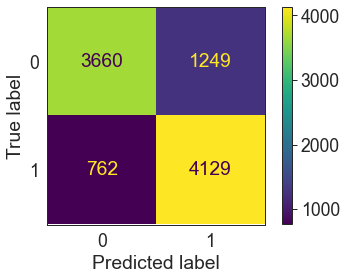

In [157]:
disp = ConfusionMatrixDisplay.from_estimator(
        logistic,
        X_test,
        Y_test,
)
plt.show()

In [158]:
iso = IsotonicRegression()
probs_cal = logistic.predict_proba(X_calib)[:, 1]
iso.fit(probs_cal, Y_calib)
new_probs = iso.transform(probas)

/usr/local/lib/python3.9/site-packages/sklearn/calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


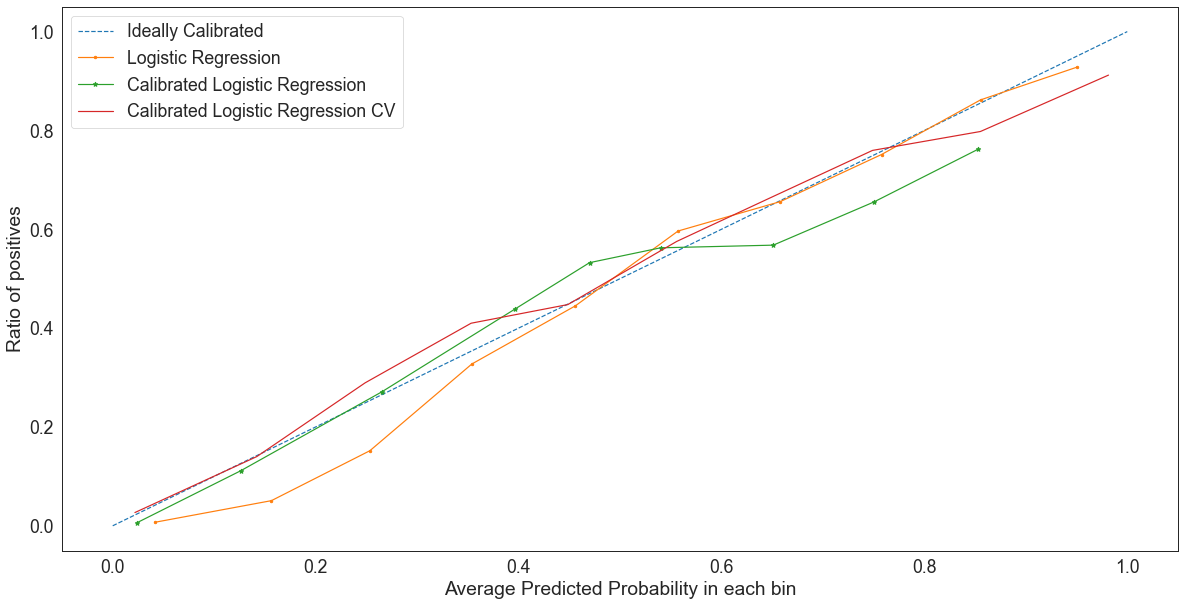

In [160]:
plt.figure(figsize=(20, 10))
prob_true, prob_pred = calibration_curve(Y_test.values, probas, n_bins=10)
fop, mpv = calibration_curve(Y_test.values, new_probs, n_bins=10)
fop2, mpv2 = calibration_curve(Y_test.values, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve

plt.plot(prob_pred, prob_true, marker = '.', label = 'Logistic Regression')
plt.plot(mpv, fop, marker = '*', label = 'Calibrated Logistic Regression')
plt.plot(mpv2, fop2, label = 'Calibrated Logistic Regression CV')
 

leg = plt.legend(loc = 'upper left')

plt.xlabel('Average Predicted Probability in each bin')

plt.ylabel('Ratio of positives')
plt.show()